# Airbnb Listing Prices and Venues Data Analysis of Seattle

## Table of contents
- [Introduction](#Introduction)
- [Data](#Data)
- [Methodology](#Methodology)
- [Analysis](#Analysis)
- [Results and Discussion](#Results)
- [Conclusion](Conclusion)

## Introduction

### Background
[Airbnb](https://en.wikipedia.org/wiki/Airbnb) is an online marketplace where users can arrange or offer accommodation or travel experiences since 2008. The properties in listings do not belong to the company. Instead it acts as a broker and receives commission for each booking. The price range of homestays depends on a range of variable such as the location, number of bedrooms and bathrooms, nearby transportation options and things to do around etc.

[Seattle](https://en.wikipedia.org/wiki/Seattle) is one of the fastest-growing cities in United States and the largest one in the state of Washington with an estimated population of 744,955 as of 2018. Since the city is the heart of many major companies in the U.S. and also has many attractions, it has millions of visitors each year. It was reported that 38.1 million people visited the city of Seattle and the King County, which is the county Seattle is located in, in [2015](https://visitseattle.org/press/press-releases/seattle-tourism-statistics-announced/) and 40 million visitors in [2018](https://visitseattle.org/press/press-releases/seattle-celebrates-record-breaking-tourism-season-with-more-than-40-million-visitors-in-2018/) with a groundbreaking record.

### Problem & Interest
The goal of this project is to visualize neighborhoods of Seattle on map regarding the average nightly prices of Airbnb places and cluster the neighborhoods in order to see if there is any relation between the Airbnb prices and venues in the neighborhood, if so what kind of venues affect the most when it comes to pricing an Airbnb accommodation.

Anyone to rent their property as an Airbnb listing in Seattle would be interested in the problem in order to set an accurate price.

## Data 

- The data was sourced from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website and the date that data was compiled on the website is 03/17/20. The attributes used in the analysis are : 
    - `neighbourhood` -  Neighborhood names of each Airbnb listing in Seattle
    - `latitude` - Latitudes of each Airbnb listing
    - `longitude` - Longitudes of each Airbnb listing
    - `price` - Nightly prices of each Airbnb listing in USD at given date
    

- [Foursquare API](https://developer.foursquare.com/) was used to get the top venues of given neighborhood in city of Seattle.

- [Seattle neighborhood boundaries json](https://github.com/seattleio/seattle-boundaries-data/blob/master/data/neighborhoods.geojson) data was utilized to get the neighborhood boundaries.

## Methodology
This project mainly consists of three steps which are analyzing Airbnb data, exploring Seattle neighborhoods and clustering Seattle neighborhoods. 

In the first step, I have obtained the Airbnb data in order to get the average nightly Airbnb accommodation prices in each neighborhood in Seattle. For this purpose, I've used only the necessary attributes which are neighbourhood, latitude, longitude and price. After obtaining desired information from the dataset, I've used the json file to get the neighborhood boundaries and modified it for only the city of Seattle and I've created a choropleth folium map to visualize the neighborhoods based on the average prices.

In the second step, I've created a map for Seattle neighborhoods just to see which neighborhood is where. And then by using Foursquare API, I've had top 100 venues in each neighborhood along with their venue category and venue latitude/longitude and created a new dataframe showing 10 most common venue type in each neighborhood.

In the third and last step, I've used K-means clustering algorithm to cluster the neighborhoods based on venue types and discover the certain similarities. To find the optimum k number of clusters I've applied elbow method first. Since there was not any solid result from that, I've applied Silhouette Score method next. In this method, optimal k is where the silhouette score is closest to 1. Thus, I've written a function to get the optimal k and it gave us k=3. Based on the result of 3 clusters, I made bar charts to see what the similarities are in each cluster and labeled them accordingly. When finilazing the project, I've created a new attribute for top 3 venue category with their counts for each neighborhood and added cluster markers containing neighborhood names, top 3 venues and average nightly Airbnb prices to the folium map that I'd created in the first step. This gives us a chance to see if there's any relation between venues and Airbnb prices in neighborhoods.

## Analysis
Let's start with importing necessary libraries and modules. And then continue with reading listings.csv file to get the information regarding the Airbnb accommodations in Seattle as of 03/17/20.

In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

# Import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
from geopy.geocoders import Nominatim



### Analyzing Airbnb data

In [2]:
# read csv file into pandas dataframe
listings = pd.read_csv('listings.csv')
listings.head()

id                                               name  host_id  \
0  2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
1  6606                Fab, private seattle urban cottage!    14942   
2  9419                Glorious sun room w/ memory foambed    30559   
3  9460     Downtown Convention Center B&B -- Free Minibar    30832   
4  9531                The Adorable Sweet Orange Craftsman    31481   

   host_name  neighbourhood_group   neighbourhood  latitude  longitude  \
0      Megan         Central Area         Madrona  47.61082 -122.29082   
1      Joyce  Other neighborhoods     Wallingford  47.65411 -122.33761   
2  Angielena  Other neighborhoods      Georgetown  47.55017 -122.31937   
3      Siena             Downtown      First Hill  47.61265 -122.32936   
4     Cassie         West Seattle  Fairmount Park  47.55539 -122.38474   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    296               7                 32  2020-02-01   
1  Entire home/apt     90              30                150  2019-09-28   
2     Private room     62               2                148  2019-12-27   
3     Private room     79               3                466  2020-03-07   
4  Entire home/apt    165               3                 40  2019-12-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.23                               2                86  
1               1.15                               3                45  
2               1.26                               8               365  
3               3.63                               4                10  
4               0.40                               2               276

We will only need some of the columns which are 'neighbourhood', 'latitude', 'longitude' and 'price'. So let's get only the needed part of the dataframe.

In [3]:
# dataframe only with the columns neighbourhood, latitude, longitude and price
listings = listings[['neighbourhood', 'latitude', 'longitude', 'price']]
listings.head()

neighbourhood  latitude  longitude  price
0         Madrona  47.61082 -122.29082    296
1     Wallingford  47.65411 -122.33761     90
2      Georgetown  47.55017 -122.31937     62
3      First Hill  47.61265 -122.32936     79
4  Fairmount Park  47.55539 -122.38474    165

Now let's see if there is any NaN values in out new dataframe.

In [4]:
# Check NaN values
listings.isnull().values.any()


False

It returns False, so we don't have any NaN valus in our dataframe. We can continue analyzing without dropping any values. Now we will create a new dataframe with the average prices for each neighborhood.

In [5]:
# Group neighborhoods by average price
neighborhoods = pd.DataFrame(listings.groupby(['neighbourhood']).mean())
neighborhoods = neighborhoods.reset_index()

# Rename columns
neighborhoods.columns = ['Neighborhood', 'Latitude', 'Longitude', 'Price']
neighborhoods.head()


Neighborhood   Latitude   Longitude       Price
0          Adams  47.671661 -122.385505  150.292035
1           Alki  47.575465 -122.407382  151.793478
2  Arbor Heights  47.510568 -122.380087  117.450000
3       Atlantic  47.595194 -122.304142  217.438095
4       Belltown  47.615327 -122.345001  181.958025

After this step, we will continue with importing json library and loading the json file regarding neighborhood boundaries in Seattle to be able to create a choropleth map and see the average Airbnb prices in each neighborhood on the map.

In [6]:
# Import json to read json file
import json

# Open json file into Jupyter Notebook
with open('seattle.json') as f:
    geo_json = json.load(f)

In [7]:
# Select the features from json file only for Seattle
features= []    
for item in geo_json['features']:
    if item['properties']['city']=='Seattle':
        features.append(item)


In [8]:
# Seattle latitude and longitude values
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Seattle are {}, {}.'.format(latitude, longitude))

# Create base map for Seattle
map_folium= folium.Map(location=[latitude, longitude], zoom_start=11)

# Create choropleth map for Seattle based on average airbnb prices
folium.Choropleth(
    geo_data={"type":"FeatureCollection","features":features}, # geographical coordinates for neighborhoods of Seattle
    name='choropleth',
    data=neighborhoods, # Data to create map for
    columns=['Neighborhood','Price'], # Columns to show on map
    key_on='feature.properties.name', # Both datasets match on neighborhood names
    fill_color='YlGn', 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Airbnb average price $',
    threshold_scale=[50,100,150,200,250,300,350,400,450,500]).add_to(map_folium)

map_folium

The geograpical coordinates of Seattle are 47.6038321, -122.3300624.


Now we can see the price range in each neighborhood except for two neighborhoods. There is no Airbnb lodging listed given the time in these neighborhoods. And it seems like prices in most of the neighborhoods are in between 100 USD and 150 USD nightly.
There is only one neighborhood with the highest range of price. Also we can see that the price ranges decrease in northern and southern outskirts of the city.

### Analyzing Seattle neighborhoods

#### Create a map of Seattle with neighborhoods

We will create a city of Seattle folium map in order to see the neighborhoods on the map as popups. Feel free to click on the markers to see the neighborhood names.

In [9]:
# Create Seattle base map
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True) # Only neighborhood names pop up when clicked on markers
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)
    
map_seattle

#### Explore neighborhoods in the city of Seattle
Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [10]:
# For more information about Foursquare API credentials please read README.md file
# Get credentials from .env file
from dotenv import load_dotenv
import os

load_dotenv()
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
VERSION = os.getenv('VERSION')

In [11]:
import requests

Let's create a function to get the top 100 venues within the 500 meter in each neighborhood.

In [12]:
# Function to get top 100 venues within 500 meter in each neighborhood

# Number of venues to get
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # Creates new dataframe for returned values
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [13]:
# I've got the data once and saved it into a csv file seattle_venues.csv 

"""seattle_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )"""

"seattle_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],\n                                   latitudes=neighborhoods['Latitude'],\n                                   longitudes=neighborhoods['Longitude']\n                                  )"

In [14]:
# Read the data into pandas
seattle_venues = pd.read_csv('seattle_venues.csv')

In [15]:
# Shape of the dataframe
print(seattle_venues.shape)

# Top 5 rows of the dataframe
seattle_venues.head()

(2087, 8)


Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0        Adams              47.671661             -122.385505   
1           1        Adams              47.671661             -122.385505   
2           2        Adams              47.671661             -122.385505   
3           3        Adams              47.671661             -122.385505   
4           4        Adams              47.671661             -122.385505   

                              Venue  Venue Latitude  Venue Longitude  \
0                       Cafe Besalu       47.671971      -122.387755   
1                 Tall Grass Bakery       47.671982      -122.387690   
2                      Kimchi House       47.671372      -122.387763   
3              Gather Kitchen + Bar       47.669723      -122.384911   
4  Cupcake Royale and Verite Coffee       47.668829      -122.384378   

            Venue Category  
0                   Bakery  
1                   Bakery  
2        Korean Restaurant  
3  New American Restaurant  
4             Cupcake Shop

Now we have the list of top 100 venues and their latitude/longitudes along with venue categories in each neighborhood. Let's count venues in each neighborhood next.

In [16]:
# Calculate the venue count based on each neighborhood limiting 100
venue_count = seattle_venues.groupby('Neighborhood').count().reset_index()
venue_count.sort_values(['Venue'], ascending = False)

Neighborhood  Unnamed: 0  Neighborhood Latitude  \
9                    Broadway         100                    100   
58                Pike-Market         100                    100   
76        University District         100                    100   
12  Central Business District         100                    100   
60             Pioneer Square         100                    100   
71           South Lake Union          97                     97   
20                 First Hill          85                     85   
35     International District          77                     77   
0                       Adams          75                     75   
79                Wallingford          67                     67   
4                    Belltown          65                     65   
24                 Georgetown          52                     52   
51              North Admiral          43                     43   
26                  Greenwood          42                     42   
13              Columbia City          40                     40   
66                  Roosevelt          38                     38   
39           Lower Queen Anne          37                     37   
23                    Genesee          37                     37   
43                       Mann          36                     36   
57              Phinney Ridge          35                     35   
42                    Madrona          28                     28   
17                   Eastlake          28                     28   
83                   Westlake          27                     27   
86             Yesler Terrace          25                     25   
1                        Alki          25                     25   
41               Madison Park          23                     23   
5                 Bitter Lake          22                     22   
21                    Fremont          22                     22   
29      Harrison/Denny-Blaine          22                     22   
48                      Minor          21                     21   
49                   Montlake          21                     21   
7                    Brighton          19                     19   
84           Whittier Heights          19                     19   
34                   Interbay          18                     18   
82              West Woodland          18                     18   
61                Portage Bay          18                     18   
74                    Stevens          18                     18   
3                    Atlantic          18                     18   
32                 Holly Park          17                     17   
81            West Queen Anne          17                     17   
59                  Pinehurst          16                     16   
44                 Maple Leaf          16                     16   
33        Industrial District          15                     15   
64                    Ravenna          15                     15   
52          North Beacon Hill          14                     14   
54             North Delridge          14                     14   
15                     Dunlap          14                     14   
27                Haller Lake          13                     13   
25                 Green Lake          11                     11   
8                   Broadview          11                     11   
80                   Wedgwood          10                     10   
10                     Bryant          10                     10   
14                 Crown Hill          10                     10   
75                Sunset Hill          10                     10   
77            Victory Heights           9                      9   
50                Mount Baker           9                      9   
38                     Leschi           9                      9   
30                 High Point           8                      8   
69   

In [17]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 282 uniques categories.


It seems that Broadway, Pike-Market, University District, Central Business District and Pioneer Square neighborhoods already hit the 100 venue limit. There may be more than 100 venues in these neighborhoods and we can see how many there are by increasing the limit if we like.

#### Analyze each neighborhood
In this step we want to get the frequency of each type on venues in each and every neighborhood in order to get the 10 most common venue type for each neighborhood. We will start with one hot encoding.

In [18]:
# One hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# Move neighborhood column to the first column
Neighborhood = seattle_onehot['Neighborhood']
seattle_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
seattle_onehot.insert(0, 'Neighborhood', Neighborhood)

seattle_onehot.head()

Neighborhood  ATM  Adult Boutique  African Restaurant  American Restaurant  \
0        Adams    0               0                   0                    0   
1        Adams    0               0                   0                    0   
2        Adams    0               0                   0                    0   
3        Adams    0               0                   0                    0   
4        Adams    0               0                   0                    0   

   Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0             0         0       0                       0            0   
1             0         0       0                       0            0   
2             0         0       0                       0            0   
3             0         0       0                       0            0   
4             0         0       0                       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Auto Workshop  Automotive Shop  \
0                      0                0              0                0   
1                      0                0              0                0   
2                      0                0              0                0   
3                      0                0              0                0   
4                      0                0              0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0          0           0       1     0    0               0                 0   
1          0           0       1     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Bike Shop  Bistro  Board Shop  Boat Rental  Boat or Ferry  Bookstore  \
0          0       0           0            0              0          0   
1          0       0           0            0              0          0   
2          0       0           0            0              0          0   
3          0       0           0            0              0          0   
4          0       0           0            0              0          0   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0                 0         0              0           0               0   
1                 0         0              0           0               0   
2                 0         0              0           0               0   
3                 0         0              0           0               0   
4                 0         0              0           0               0   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0        0            0                0         0             0   
1        0            0                0         0             0   
2        0            0                0         0             0   
3        0            0               

In [19]:
seattle_onehot.shape

(2087, 282)

Now let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.


In [20]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.head()

Neighborhood  ATM  Adult Boutique  African Restaurant  \
0          Adams  0.0             0.0            0.000000   
1           Alki  0.0             0.0            0.000000   
2  Arbor Heights  0.0             0.0            0.000000   
3       Atlantic  0.0             0.0            0.055556   
4       Belltown  0.0             0.0            0.000000   

   American Restaurant  Antique Shop  Aquarium  Arcade  \
0                  0.0           0.0       0.0     0.0   
1                  0.0           0.0       0.0     0.0   
2                  0.0           0.0       0.0     0.0   
3                  0.0           0.0       0.0     0.0   
4                  0.0           0.0       0.0     0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0         0.00         0.0                  0.0   
1                     0.0         0.04         0.0                  0.0   
2                     0.0         0.00         0.0                  0.0   
3                     0.0         0.00         0.0                  0.0   
4                     0.0         0.00         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0               0.0                 0.0                    0.0   
1               0.0                 0.0                    0.0   
2               0.0                 0.0                    0.0   
3               0.0                 0.0                    0.0   
4               0.0                 0.0                    0.0   

   Auto Dealership  Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  \
0              0.0            0.0              0.0   0.013333         0.0   
1              0.0            0.0              0.0   0.000000         0.0   
2              0.0            0.0              0.0   0.000000         0.0   
3              0.0            0.0              0.0   0.000000         0.0   
4              0.0            0.0              0.0   0.000000         0.0   

     Bakery      Bank       Bar  Baseball Field  Basketball Court  Beach  \
0  0.040000  0.013333  0.026667        0.013333               0.0    0.0   
1  0.000000  0.000000  0.000000        0.000000               0.0    0.0   
2  0.000000  0.000000  0.000000        0.000000               0.0    0.0   
3  0.055556  0.055556  0.000000        0.000000               0.0    0.0   
4  0.046154  0.000000  0.076923        0.000000               0.0    0.0   

   Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Bike Shop  \
0       0.00              0.0  0.013333     0.013333    0.000000        0.0   
1       0.04              0.0  0.000000     0.000000    0.000000        0.0   
2       0.00              0.0  0.000000     0.000000    0.000000        0.0   
3       0.00              0.0  0.000000     0.000000    0.000000        0.0   
4       0.00              0.0  0.015385     0.000000    0.015385        0.0   

     Bistro  Board Shop  Boat Rental  Boat or Ferry  Bookstore  \
0  0.000000         0.0          0.0            0.0   0.013333   
1  0.000000         0.0          0.0            0.0   0.000000   
2  0.000000         0.0          0.0            0.0   0.000000   
3  0.000000         0.0          0.0            0.0   0.000000   
4  0.015385         0.0          0.0            0.0   0.000000   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0          0.000000       0.0            0.0         0.0        0.000000   
1          0.000000       0.0            0.0         0.0        0.000000   
2          0.000000       0.0            0.0         0.0        0.000000   
3          0.000000       0.0            0.0         0.0        0.000000   
4          0.015385       0.0            0.0         0.0        0.046154   

    Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0  0.000000          0.0              0.0       0.0      0.053333   
1  0.000000          0.0              0.0       0.0  

__Now let's create the new dataframe and display the top 10 venues for each neighborhood.__

In [21]:
# Function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood     1st Most Common Venue 2nd Most Common Venue  \
0          Adams            Ice Cream Shop          Burger Joint   
1           Alki               Coffee Shop                  Park   
2  Arbor Heights                       Spa           Yoga Studio   
3       Atlantic  Mediterranean Restaurant                  Park   
4       Belltown                       Bar           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0       Thai Restaurant                Bakery           Coffee Shop   
1    Italian Restaurant        Ice Cream Shop                 Trail   
2           Fish Market           Event Space    Falafel Restaurant   
3    Seafood Restaurant        Sandwich Place                  Bank   
4        Breakfast Spot                Bakery    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue  \
0      Sushi Restaurant    Mexican Restaurant   
1            Sports Bar     Fish & Chips Shop   
2        Farmers Market  Fast Food Restaurant   
3                Bakery           Dry Cleaner   
4           Coffee Shop      Sushi Restaurant   

                      8th Most Common Venue 9th Most Common Venue  \
0                                  Dive Bar          Dessert Shop   
1                         French Restaurant           Event Space   
2                                     Field     Fish & Chips Shop   
3  Residential Building (Apartment / Condo)                 Trail   
4                                       Gym              Dive Bar   

  10th Most Common Venue  
0     Italian Restaurant  
1              Beach Bar  
2            Flea Market  
3             Skate Park  
4   Marijuana Dispensary

### Cluster Neighborhoods
In this step, we will use K-means clustering algorithm in order to cluster the neighborhoods based on venue types and discover the certain similarities.First we will use the __elbow method__ to find the optimum __k__ number of centroids.

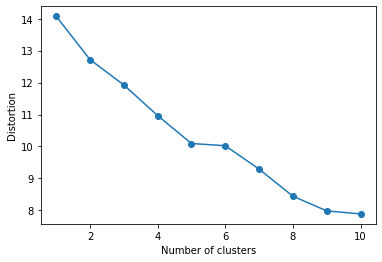

In [23]:
# Import libraries and associated modules
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt

# New dataframe to cluster the neighborhoods
seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# Elbow method to find the optimum k value
distortions = []
for i in range(1,11): # k value between 1 and 11
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(seattle_grouped_clustering)
    distortions.append(km.inertia_)

# Plot elbow
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



For our data, elbow method did not actually produce an elbow where the rest of the line flattened out. So we will try another method which is called __Silhouette Score__ to find the optimal __k__.

In [24]:
# Import libraries and associated modules
from sklearn.metrics import silhouette_score

# Create a dictionary with k as the key and silhouette score as the value
k_vs_score = {}

# Calculate silhouette score
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state = 2)
    preds = clusterer.fit_predict(seattle_grouped_clustering)
    centers = clusterer.cluster_centers_

    k_vs_score[n_clusters] = silhouette_score(seattle_grouped_clustering, preds, metric = 'euclidean')
    
k_vs_score

{2: 0.3816392081147356,
 3: 0.38868688924395206,
 4: 0.3782130540418221,
 5: 0.38570238273637836,
 6: 0.3854391525550152,
 7: 0.31612462663643803,
 8: 0.15245865340405504,
 9: 0.24440404893345583}

The silhouette score varies between -1 and 1 where 1 means the data instance is matched within its cluster closely. So we want the score as close to 1 as possible to select our number of clusters. Thus we will select the k value where the silhouette score is maximum, which is k=3.

In [25]:
# Set number of clusters
k=3
kclusters = k

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=20).fit(seattle_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's create a new dataframe that includes the cluster labels as well as the top 10 venues for each neighborhood.

In [26]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# New dataframe to get the latitude/longitude for each neighborhood
seattle_merged = neighborhoods.iloc[:,0:3]

# Merge seattle_merged with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head()


Neighborhood   Latitude   Longitude  Cluster Labels  \
0          Adams  47.671661 -122.385505             1.0   
1           Alki  47.575465 -122.407382             1.0   
2  Arbor Heights  47.510568 -122.380087             1.0   
3       Atlantic  47.595194 -122.304142             1.0   
4       Belltown  47.615327 -122.345001             1.0   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Ice Cream Shop          Burger Joint       Thai Restaurant   
1               Coffee Shop                  Park    Italian Restaurant   
2                       Spa           Yoga Studio           Fish Market   
3  Mediterranean Restaurant                  Park    Seafood Restaurant   
4                       Bar           Pizza Place        Breakfast Spot   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                Bakery           Coffee Shop      Sushi Restaurant   
1        Ice Cream Shop                 Trail            Sports Bar   
2           Event Space    Falafel Restaurant        Farmers Market   
3        Sandwich Place                  Bank                Bakery   
4                Bakery    Italian Restaurant           Coffee Shop   

  7th Most Common Venue                     8th Most Common Venue  \
0    Mexican Restaurant                                  Dive Bar   
1     Fish & Chips Shop                         French Restaurant   
2  Fast Food Restaurant                                     Field   
3           Dry Cleaner  Residential Building (Apartment / Condo)   
4      Sushi Restaurant                                       Gym   

  9th Most Common Venue 10th Most Common Venue  
0          Dessert Shop     Italian Restaurant  
1           Event Space              Beach Bar  
2     Fish & Chips Shop            Flea Market  
3                 Trail             Skate Park  
4              Dive Bar   Marijuana Dispensary

In [27]:
# Check if there is any NaN values
seattle_merged['Cluster Labels'].isnull().value_counts()


False    87
True      2
Name: Cluster Labels, dtype: int64

In [28]:
# Drop NaN values
seattle_merged = seattle_merged.dropna()

#### Let's explore each cluster

In [29]:
first_cluster = seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]
first_cluster.head()

Neighborhood  Cluster Labels 1st Most Common Venue  \
16     East Queen Anne             0.0            Playground   
31       Highland Park             0.0            Playground   
57       Olympic Hills             0.0            Playground   
74          South Park             0.0                  Park   
75  Southeast Magnolia             0.0            Playground   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
16                  Park     Electronics Store           Event Space   
31        Baseball Field  Ethiopian Restaurant    Falafel Restaurant   
57           Bus Station     Electronics Store           Event Space   
74            Playground               Brewery     Fish & Chips Shop   
75              Bus Stop        Baseball Field           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
16    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
31        Farmers Market  Fast Food Restaurant                 Field   
57    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
74           Event Space    Falafel Restaurant        Farmers Market   
75           Fish Market        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
16                 Field     Fish & Chips Shop            Yoga Studio  
31     Fish & Chips Shop           Fish Market            Yoga Studio  
57                 Field     Fish & Chips Shop            Yoga Studio  
74  Fast Food Restaurant                 Field            Yoga Studio  
75                 Field     Fish & Chips Shop            Flea Market

In [30]:
second_cluster = seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]
second_cluster.head()

Neighborhood  Cluster Labels     1st Most Common Venue  \
0          Adams             1.0            Ice Cream Shop   
1           Alki             1.0               Coffee Shop   
2  Arbor Heights             1.0                       Spa   
3       Atlantic             1.0  Mediterranean Restaurant   
4       Belltown             1.0                       Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Burger Joint       Thai Restaurant                Bakery   
1                  Park    Italian Restaurant        Ice Cream Shop   
2           Yoga Studio           Fish Market           Event Space   
3                  Park    Seafood Restaurant        Sandwich Place   
4           Pizza Place        Breakfast Spot                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Coffee Shop      Sushi Restaurant    Mexican Restaurant   
1                 Trail            Sports Bar     Fish & Chips Shop   
2    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
3                  Bank                Bakery           Dry Cleaner   
4    Italian Restaurant           Coffee Shop      Sushi Restaurant   

                      8th Most Common Venue 9th Most Common Venue  \
0                                  Dive Bar          Dessert Shop   
1                         French Restaurant           Event Space   
2                                     Field     Fish & Chips Shop   
3  Residential Building (Apartment / Condo)                 Trail   
4                                       Gym              Dive Bar   

  10th Most Common Venue  
0     Italian Restaurant  
1              Beach Bar  
2            Flea Market  
3             Skate Park  
4   Marijuana Dispensary

In [31]:
third_cluster = seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]
third_cluster

Neighborhood  Cluster Labels       1st Most Common Venue  \
64  Rainier View             2.0  Construction & Landscaping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
64           Yoga Studio           Fish Market           Event Space   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
64    Falafel Restaurant        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
64                 Field     Fish & Chips Shop            Flea Market

##### Visualize clusters

Text(0.5, 0, 'cluster 0')

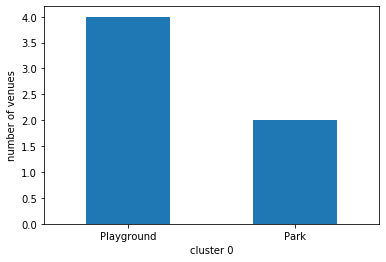

In [32]:
# Visualize first cluster by venues value count
first_cluster['1st Most Common Venue'].value_counts().plot(kind = 'bar', rot = 0)
plt.ylabel('number of venues')
plt.xlabel('cluster 0')

In the first clusters, which has a cluster label of '0', there are 4 playgrounds and 3 parks so we can label this cluster as 'Outdoor Activities'.

Text(0.5, 0, 'cluster 1')

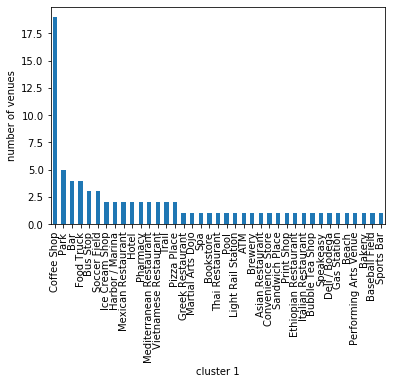

In [33]:
# Visualize second cluster by venues value count
second_cluster['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.ylabel('number of venues')
plt.xlabel('cluster 1')

In our second cluster, which has a cluster label of '1', there are 19 coffee shops by far more than any other type of venue. 4 bars, 4 parks and 4 food trucks follow coffee shops. It's appropriate to label this cluster as 'Coffee Shops'.

Text(0.5, 0, 'cluster 2')

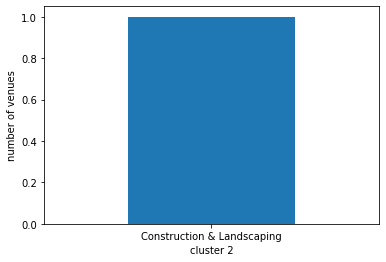

In [34]:
# Visualize third cluster by venues value count
third_cluster['1st Most Common Venue'].value_counts().plot(kind = 'bar', rot = 0)
plt.ylabel('number of venues')
plt.xlabel('cluster 2')

In the last cluster, which has a cluster label of '2', there is only 1 venue which is a Construction & Landscaping type. So we label this cluster as 'Landscaping'.

Label each cluster:
- Cluster 0 : 'Outdoor Activities' 
- Cluster 1 : 'Coffee Shops'
- Cluster 2 : 'Landscaping'

In [35]:
# Create a new dataframe for labels for each cluster
d = {'Cluster Labels': [0.0, 1.0, 2.0],'Labels': ['Outdoor Activities', 'Coffee Shops', 'Landscaping']}
cluster_labels = pd.DataFrame(data = d)

In [36]:
# Merge labels to the dataframe
seattle_merged = seattle_merged.merge(cluster_labels, on = 'Cluster Labels')
seattle_merged.head()

Neighborhood   Latitude   Longitude  Cluster Labels  \
0          Adams  47.671661 -122.385505             1.0   
1           Alki  47.575465 -122.407382             1.0   
2  Arbor Heights  47.510568 -122.380087             1.0   
3       Atlantic  47.595194 -122.304142             1.0   
4       Belltown  47.615327 -122.345001             1.0   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Ice Cream Shop          Burger Joint       Thai Restaurant   
1               Coffee Shop                  Park    Italian Restaurant   
2                       Spa           Yoga Studio           Fish Market   
3  Mediterranean Restaurant                  Park    Seafood Restaurant   
4                       Bar           Pizza Place        Breakfast Spot   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                Bakery           Coffee Shop      Sushi Restaurant   
1        Ice Cream Shop                 Trail            Sports Bar   
2           Event Space    Falafel Restaurant        Farmers Market   
3        Sandwich Place                  Bank                Bakery   
4                Bakery    Italian Restaurant           Coffee Shop   

  7th Most Common Venue                     8th Most Common Venue  \
0    Mexican Restaurant                                  Dive Bar   
1     Fish & Chips Shop                         French Restaurant   
2  Fast Food Restaurant                                     Field   
3           Dry Cleaner  Residential Building (Apartment / Condo)   
4      Sushi Restaurant                                       Gym   

  9th Most Common Venue 10th Most Common Venue        Labels  
0          Dessert Shop     Italian Restaurant  Coffee Shops  
1           Event Space              Beach Bar  Coffee Shops  
2     Fish & Chips Shop            Flea Market  Coffee Shops  
3                 Trail             Skate Park  Coffee Shops  
4              Dive Bar   Marijuana Dispensary  Coffee Shops

#### Top 3 venue type in each neighborhood
In this step we will get the top 3 types of venues in each neighborhood with the venue counts and add this information to our main dataframe containing 10 most common venues in each neighborhood.

In [37]:
# Create new empty dataframe for top 3 venues in each neighborhood
sv_data = pd.DataFrame(columns = ['Neighborhood', 'Top_3_Venues'])

# Get top 3 venues in each neighborhood
for hood in seattle_venues['Neighborhood'].unique():
    temp = seattle_venues[seattle_venues['Neighborhood']== hood]
    series = temp['Venue Category'].value_counts()[0:3]
    string = ''
    
    for item, i in zip(series,range(len(series))):
        string = string+str(item)+' '+series.keys()[i]
        if i < len(series)-1:
            string = string + ', '
    new_row = {'Neighborhood': hood, 'Top_3_Venues': string}
    sv_data = sv_data.append(new_row, ignore_index=True)  # Append values to the dataframe
    
sv_data.head()

Neighborhood                                       Top_3_Venues
0          Adams    4 Ice Cream Shop, 4 Burger Joint, 3 Coffee Shop
1           Alki        3 Park, 3 Coffee Shop, 2 Italian Restaurant
2  Arbor Heights                                              1 Spa
3       Atlantic  1 Dance Studio, 1 Seafood Restaurant, 1 Dry Cl...
4       Belltown           5 Pizza Place, 5 Bar, 3 Sushi Restaurant

In [38]:
# Merge top 3 venues to the existing dataframe for each neighborhood
seattle_merged = seattle_merged.merge(sv_data, on = 'Neighborhood')

# Get only the Neighborhood and Price columns in neighborhoods dataframe
neighborhoods = neighborhoods.drop(columns = ['Latitude', 'Longitude'])

# Merge neighborhoods dataframe to the existing dataframe to get the average Airbnb prices for each neighborhood
seattle_merged = seattle_merged.merge(neighborhoods, on = 'Neighborhood')
seattle_merged.head()

Neighborhood   Latitude   Longitude  Cluster Labels  \
0          Adams  47.671661 -122.385505             1.0   
1           Alki  47.575465 -122.407382             1.0   
2  Arbor Heights  47.510568 -122.380087             1.0   
3       Atlantic  47.595194 -122.304142             1.0   
4       Belltown  47.615327 -122.345001             1.0   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Ice Cream Shop          Burger Joint       Thai Restaurant   
1               Coffee Shop                  Park    Italian Restaurant   
2                       Spa           Yoga Studio           Fish Market   
3  Mediterranean Restaurant                  Park    Seafood Restaurant   
4                       Bar           Pizza Place        Breakfast Spot   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                Bakery           Coffee Shop      Sushi Restaurant   
1        Ice Cream Shop                 Trail            Sports Bar   
2           Event Space    Falafel Restaurant        Farmers Market   
3        Sandwich Place                  Bank                Bakery   
4                Bakery    Italian Restaurant           Coffee Shop   

  7th Most Common Venue                     8th Most Common Venue  \
0    Mexican Restaurant                                  Dive Bar   
1     Fish & Chips Shop                         French Restaurant   
2  Fast Food Restaurant                                     Field   
3           Dry Cleaner  Residential Building (Apartment / Condo)   
4      Sushi Restaurant                                       Gym   

  9th Most Common Venue 10th Most Common Venue        Labels  \
0          Dessert Shop     Italian Restaurant  Coffee Shops   
1           Event Space              Beach Bar  Coffee Shops   
2     Fish & Chips Shop            Flea Market  Coffee Shops   
3                 Trail             Skate Park  Coffee Shops   
4              Dive Bar   Marijuana Dispensary  Coffee Shops   

                                        Top_3_Venues       Price  
0    4 Ice Cream Shop, 4 Burger Joint, 3 Coffee Shop  150.292035  
1        3 Park, 3 Coffee Shop, 2 Italian Restaurant  151.793478  
2                                              1 Spa  117.450000  
3  1 Dance Studio, 1 Seafood Restaurant, 1 Dry Cl...  217.438095  
4           5 Pizza Place, 5 Bar, 3 Sushi Restaurant  181.958025

#### Cluster map for Seattle
Now let's create a cluster map to combine with our Airbnb price map we created earlier to see if there is any relation between venues and Airbnb prices.

In [39]:
# Create neighborhood cluster map for Seattle

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster, venue, price in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels'], seattle_merged['Top_3_Venues'], seattle_merged['Price']):
    label = folium.Popup(str(poi) + ' / ' +venue +' / '+ str(int(price))+ ' USD') # Pop up neighborhood name, top 3 venues and average airbnb price in USD
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_folium)
       
map_folium



## Results and Discussion
The analysis shows that the average nightly Airbnb prices are in higher ranges (between 250 USD-500 USD ) in central neighborhoods than the rest of the city of Seattle. It seems like the average price range is the same in big part of the city which is between 100 and 150 USD while it decreases in northern and southern outskirts of the city.

The purple colored cluster shows us there are mostly coffee shops all around the city and considering the fact that Seattle is known for its outstanding coffee culture and many of the city's residents are coffee admirers it is not surprising. When we turn our focus to red colored markers, since they are labeled as Outdoor Activities they might be residential areas. And in the last cluster there is only one type of venue which is Construction & Landscaping. The neighborhood that belongs to this cluster is located in the southernmost of the city. 

When we take a look at darker green colored areas there are hotels, restaurants, theaters and opera centers along with coffee shops. Especially the number of hotels can give us an idea that these neighborhoods mostly attract people for touristic or business purposes and it makes accommodation prices higher in these neighborhoods. But in general it doesn't seem like the venue types in neighborhoods affect the Airbnb prices except for central Seattle. 

## Conclusion
In this project, identifying the relation between average Airbnb prices and venues in neighborhoods was aimed. The result shows us that the prices mostly depend on the location rather than venues. On the other hand, it indicates that the neighborhoods with the most number of hotels and their surrounding neighborhoods would be high price range areas to rent a property as an Airbnb accommodation. Since the location and surrounding venues are not the only criteria for pricing, this project can be improved with further analysis.